In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable

labels=[]
preds=[]
dbfile = open('./knn-predictions/base-test-predictions-1575836051.143159.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_base')
dbfile.close()
dbfile = open('./knn-predictions/basic-test-predictions-1575835928.691891.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_basic')
dbfile.close()
dbfile = open('./knn-predictions/d2v-test-predictions-1575836012.216281.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_d2v')
dbfile.close()

dbfile = open('./nn-final-models/base-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_base')
dbfile.close()
dbfile = open('./nn-final-models/basicname-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_basic')
dbfile.close()
dbfile = open('./nn-final-models/doc2vec-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_d2v')
dbfile.close()

dbfile = open('./svm-predictions/base-test-predictions-1575838424.324989.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_base')
dbfile.close()
dbfile = open('./svm-predictions/basic-test-predictions-1575835932.142707.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_basic')
dbfile.close()

dbfile = open('./Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_base')
dbfile.close()
dbfile = open('./Figures/LogReg/BasicNamesDataSet/yhat_TEST_BasicName.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_basic')
dbfile.close()
dbfile = open('./Figures/LogReg/Doc2VecDataSet/yhat_TEST_Doc2Vec.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/Ada_Pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_base')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_basic')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/rfc_pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_base')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_basic')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_d2v')
dbfile.close()

y_test=np.array(pd.read_csv("./data/preprocess-base-y-test.csv")['success'])

In [2]:
for i in range(len(preds)):
    preds[i]=preds[i].flatten()
    
for i in range(len(preds)):
    preds[i]=preds[i].tolist()
    
for i in range(len(preds)):
    if type(preds[i][0])!=type(True):
        for j in range(len(preds[0])):
            preds[i][j]=True if preds[i][j] >= .5 else False
preds=np.asarray(preds)

In [3]:
def comparePredictions(predictions,modelNames):
    l={}
    n_pred=len(predictions[0])
    tbl=np.zeros((len(predictions)+1,len(predictions)+1)).tolist()
    tbl[0][0]=''
    for i,n1 in zip(range(len(predictions)),modelNames):
        tbl[0][i+1]=n1
        tbl[i+1][0]=n1
        for j,n2 in zip(range(len(predictions)),modelNames):
            
            c=0
            for k in range(n_pred):
                if predictions[i][k]==predictions[j][k]:
                    c+=1
            
            tbl[i+1][j+1]=round(c/n_pred*100,0)
            l[n1+' '+n2]=round(c/n_pred*100,0)
#     print(tbl)
    return tbl

In [4]:
def allWrongPredictions(predictions,y_test,modelNames):
    all_faileds=[]
    for k in range(len(y_test)):
        all_failed=True
        for i in predictions:
            if i[k]==y_test[k]:
                all_failed=False
        if all_failed:
            all_faileds.append(k)
    return all_faileds
wrong=allWrongPredictions(preds,y_test,labels)

def allRightPredictions(predictions,y_test,modelNames):
    all_rights=[]
    for k in range(len(y_test)):
        all_right=True
        for i in predictions:
            if i[k]!=y_test[k]:
                all_right=False
        if all_right:
            all_rights.append(k)
    return all_rights
rights=allRightPredictions(preds,y_test,labels)

0.994217019330596


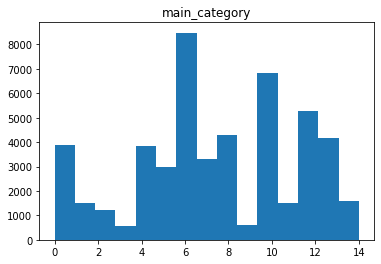

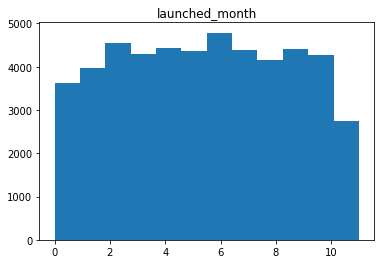

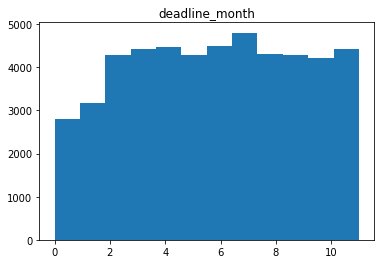

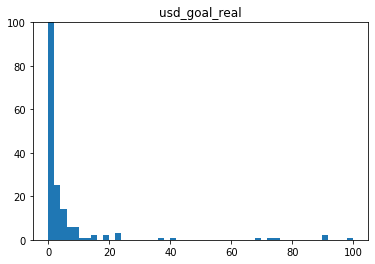

In [46]:
df=pd.read_csv("./data/preprocess-base-x-test.csv")
fig=df.hist(column='main_category',bins=len(list(df.main_category.unique())),grid=False)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])


df.hist(column='launched_month',bins=len(list(df.launched_month.unique())),grid=False)
df.hist(column='deadline_month',bins=len(list(df.deadline_month.unique())),grid=False)
df.hist(column='usd_goal_real',bins=50,grid=False)
plt.ylim(0,100)
print(np.std(df.usd_goal_real))

0.994217019330596


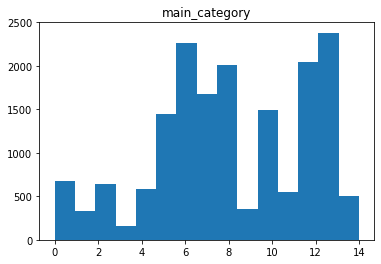

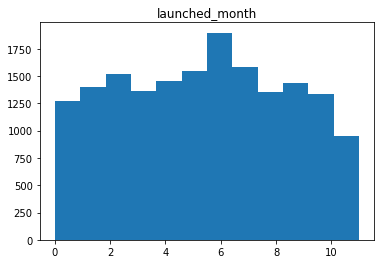

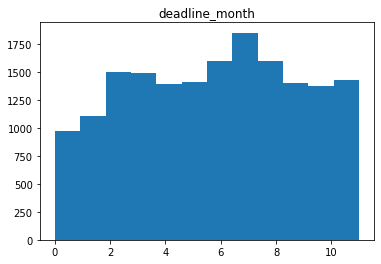

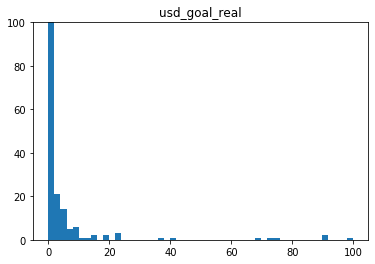

In [45]:
dfright=df.iloc[rights]
dfright.hist(column='main_category',bins=len(list(dfright.main_category.unique())),grid=False)
dfright.hist(column='launched_month',bins=len(list(dfright.launched_month.unique())),grid=False)
dfright.hist(column='deadline_month',bins=len(list(dfright.deadline_month.unique())),grid=False)
dfright.hist(column='usd_goal_real',bins=50,grid=False)
plt.ylim(0,100)
print(np.std(df.usd_goal_real))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122512e48>,
      dtype=object)

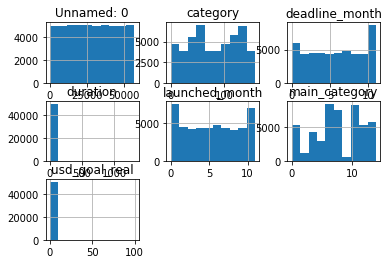

In [7]:
df.hist()

In [8]:
dfwrong=df.iloc[wrong]

['main_category', 'category', 'duration', 'usd_goal_real', 'launched_month', 'deadline_month']
0.994217019330596


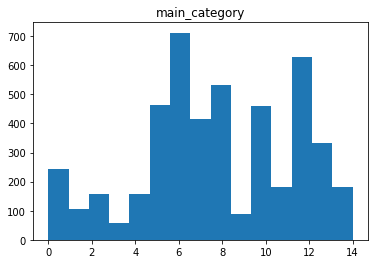

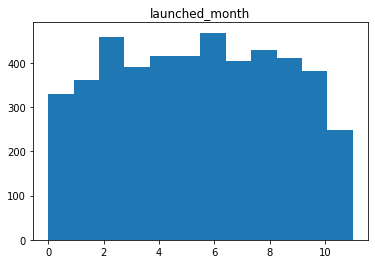

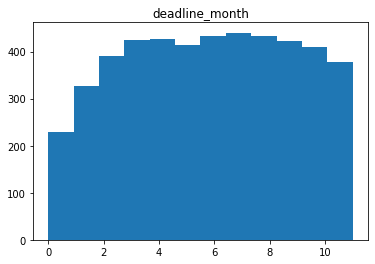

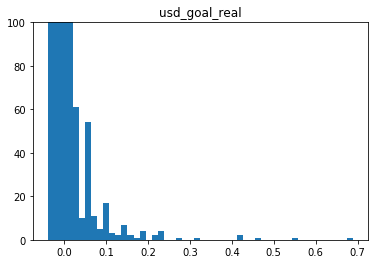

In [47]:
print(list(df.columns)[1:])
cols=['main_category','launched_month','deadline_month']

dfwrong.hist(column='main_category',bins=len(list(dfwrong.main_category.unique())),grid=False)
dfwrong.hist(column='launched_month',bins=len(list(dfwrong.launched_month.unique())),grid=False)
dfwrong.hist(column='deadline_month',bins=len(list(dfwrong.deadline_month.unique())),grid=False)
dfwrong.hist(column='usd_goal_real',bins=50,grid=False)
plt.ylim(0,100)
print(np.std(df.usd_goal_real))

In [ ]:
df.loc(wrong)